# Description
Add to the queueing simulator you have already developed (lab 1) some routines to:

a) detect the end of transient in an automated way (write a short report to describe the algorithm you have employed)

b) evaluate the accuracy of results.

Your code should employ a "batch means" technique that adaptively chooses  the number of batches so to achieve outputs with a desired degree of accuracy. 

Define properly the accuracy metric, which should be related to the width of confidence intervals.

Plot of the average delay in function of the utilisation, where the utilisation is: 0.1, 0.2, 0.4, 0.7, 0.8, 0.9, 0.95, 0.99. Show also the 95%-level confidence intervals.

Consider three scenarios for the service time:

EXP: exponentially distributed with mean=1

DET: deterministic =1

HYP:  distributed according to a hyper-exponential distribution with mean=1 standard deviation=10

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

# Defining functions and classes

In [2]:
def arrival(time, FES, queue, average_arrival_time, average_service_time):
    
    global users
    global customer
    
    # introducing random client arrival
    # inter_arrival = np.random.exponential(1.0/average_arrival_time)
    inter_arrival = random.expovariate(1.0/average_arrival_time)
    #FES.put((time + inter_arrival, 'arrival'))
    FES.append((time + inter_arrival, 'arrival'))
    
    # managing the event 
    users += 1
    x = 'client' + str(customer)
    customer += 1
    
    # recording client id and put it in the list
    client = Client(x, time)
    queue.append(client)

    print(f'{client.name} arrived at {client.arrival_time}')
    
    # start the service in case the server is idle
    if users == 1:
        # scheduling random departure time to the clients
        # service_time = np.random.exponential(1.0/average_service_time)
        service_time = random.expovariate(1.0/average_service_time)
        FES.append((time + service_time, 'departure'))


def departure(time, FES, queue, average_arrival_time, average_service_time):
    
    global users
    
    # manipulating the list of clients to get FIFO orientation
    queue.reverse()
    client = queue.pop()
    queue.reverse()
    users -= 1
    delay = time - client.arrival_time
    
    print(f'{client.name} departured at {time}')
    
    # checking the number of clients in line
    if users > 0:
        # scheduling random departure time to the clients
        # service_time = np.random.exponential(1.0/average_service_time)
        service_time = random.expovariate(1.0/average_service_time)
        FES.append((time + service_time, 'departure'))
    
    return delay

class Client:
    def __init__(self, name, arrival_time):
        self.name = name
        self.arrival_time = arrival_time
        

# Finding transient knee (k)
In order to find the transient knee (k), we should implement the simulation for a long time and compute the average. Afterwards, we should calculate the average depending on k to plot. Fianlly, k is determined by this plot.

In [3]:
def finding_transient(delay_list):
    
    delay_ave = sum(delay_list) / len(delay_list)
    delay_ave_k = {}
    delay_ave_r = {}
    
    for k in range(len(delay_list)):
        temp = sum(delay_list[(k):]) / (len(delay_list) - k)
        delay_ave_k[k] = temp
        delay_ave_r[k] = (temp/delay_ave) - 1
    
    print('*****************************', k)
    plt.plot(delay_ave_k.keys(), delay_ave_k.values())
    # plt.plot(delay_ave_r.keys(), delay_ave_r.values())
    
    return delay_ave_k

In [10]:
np.random.seed(32)
random.seed(42)

simulation_time = 10000
utilization = [0.1, 0.2, 0.4, 0.7, 0.8, 0.9, 0.95, 0.99]
average_service_time = 1
cumulative_delay = []
variance_delay = []

for u in [0.7]:
    # initialization of variables
    
    time = 0
    users = 0
    customer = 1
    queue = []
    FES = []
    delay = []
    
    FES.append((0,'arrival'))
    target = 0
    
    Lambda = u/average_service_time
    average_arrival_time = 1/Lambda
    
    while time < simulation_time:
        
        FES = sorted(FES)
        (time, event_type) = FES[target]
        
        if event_type == 'arrival':
            arrival(time, FES, queue, average_arrival_time, average_service_time)
        elif event_type == 'departure':
            delay.append(departure(time, FES, queue, average_arrival_time, average_service_time))
            cumulative_delay.append(sum(delay)/len(delay))
            variance_delay.append(np.var(delay))
            
        target += 1
        
    # temp = finding_transient(delay)
        
        

client1 arrived at 0
client1 departured at 0.02532883904273889
client2 arrived at 1.4572289818211444
client2 departured at 1.7098151674912578
client3 arrived at 1.9166919304996666
client3 departured at 3.0458649392982595
client4 arrived at 3.8218243202254993
client4 departured at 3.9127767248320655
client5 arrived at 7.003664462441757
client5 departured at 7.033914639649116
client6 arrived at 7.7865875472938875
client7 arrived at 8.139039970093636
client8 arrived at 8.17746054677979
client6 departured at 8.49050307516004
client9 arrived at 8.494162931299332
client7 departured at 9.539995076382613
client10 arrived at 9.618919008788477
client8 departured at 9.789021495349438
client11 arrived at 10.890074303505282
client12 arrived at 10.899388544297091
client9 departured at 11.446759589572535
client10 departured at 12.64454953054602
client11 departured at 13.0604446170446
client12 departured at 13.22943088513187
client13 arrived at 13.240768347283593
client13 departured at 13.651137277164

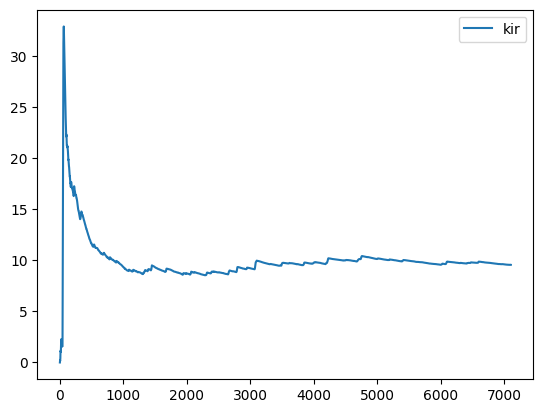

In [23]:
from scipy.interpolate import make_interp_spline
x = range(len(variance_delay))
y = variance_delay
xyspl = make_interp_spline(x, y)
x_ = np.linspace(min(x), max(x), 5000)
y_ = xyspl(x_)

# plt.plot(len(variance_delay), cumulative_delay)
plt.plot(x_, y_, label='kir')
#plt.yscale('log')
plt.legend()

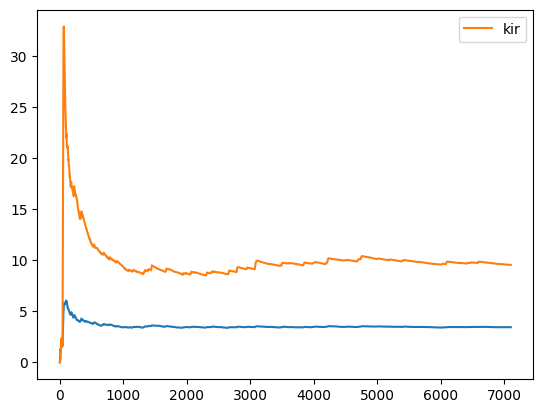

In [36]:
plt.plot(cumulative_delay)
plt.plot(variance_delay, label='kir')
# plt.yscale('log')
plt.legend()

In [45]:
def transient_point(variance_list):
    
    var_ave = np.mean(variance_list)
    var_std = np.std(variance_list)
    print(var_ave, var_std)
    var_max = max(variance_list)
    j = variance_list.index(var_max)
    
    for i in range(j, len(variance_list)):
        if (variance_list[i] > var_ave - var_std/2) and (variance_list[i] < var_ave + var_std/2):
            return i

ali = transient_point(variance_delay)
ali

10.001372387717884 2.2943962347689015


593

In [47]:
variance_delay[593], cumulative_delay[593], np.mean(cumulative_delay)

(11.132187449331282, 3.7226007473960623, 3.5426515855125054)

10.001372387717884 2.2943962347689015


593